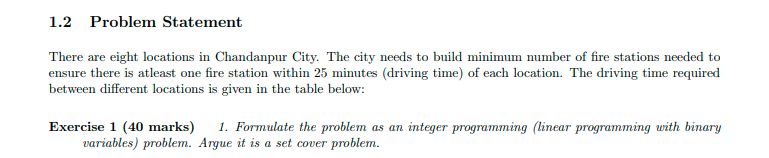

**Exercise 1**
The formulation is given as:

Integer Programming Formulation

**Objective:**

$$ min\sum_{i=1}^{n} x_i $$

**Constraints:**
$$ \sum_{i=1}^{n} (t_{ij} \cdot x_i) \leq 25, \quad \forall j=1,2,...,n $$

$$ \sum_{j=1}^{n} (t_{ij} \cdot x_j) \leq 25, \quad \forall i=1,2,...,n $$

**Binary Decision Variables:**
$$ x_i \in \{0,1\}, \quad \forall i=1,2,...,n $$


**Argument**

In this problem, locations represent elements requiring coverage, and sets represent potential fire station locations. The driving time constraint stipulates that each element must be covered within 25 minutes by at least one set (fire station). Thus, the problem resembles a set cover problem, where the aim is to minimize the number of sets (fire stations) required to cover all elements (locations). The task entails selecting the optimal placement of fire stations to ensure comprehensive coverage while minimizing the overall number of stations needed. This optimization seeks to efficiently allocate resources and infrastructure to ensure effective emergency response and safety across the geographical area.

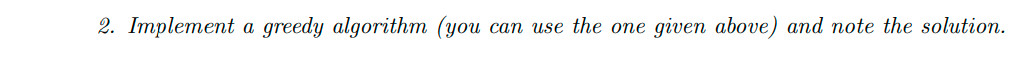

In [29]:
# Greedy Algo for set cover
def greedy_set_cover(subsets, universe):
    picked_sets = []
    covered_elements = set()

    while covered_elements != universe:
        max_new_elements = 0
        best_set = None

        for subset in subsets:
            new_elements = len(subset - covered_elements)
            if new_elements > max_new_elements:
                max_new_elements = new_elements
                best_set = subset

        if best_set:
            picked_sets.append(best_set)
            covered_elements |= best_set

    return picked_sets

In [27]:
Collection_of_subsets=[{"A",'B','C','H'},{"B","D"},{'C','H'},{"D","E"},{"E","G"},{"F","G"}] # only consider distances which is less than equal to 25min

Universe={"A","B","C","D","E","F","G","H"}

solution_set=greedy_set_cover(Collection_of_subsets,Universe)

print("The minimum fire stations ensuring 25-minute driving time are:",len(solution_set))
# prinitng the locations where these stations can be placed
location=[]
for i in solution_set:
  a=list(i)
  location.append(a)
for i in range(len(solution_set)):
  a=location[i][0]
  print(f"The {i+1} fire station can be placed at {a}")
print("##############################")
print("Solution set are:",solution_set)

The minimum fire stations ensuring 25-minute driving time are: 3
The 1 fire station can be placed at B
The 2 fire station can be placed at E
The 3 fire station can be placed at G
##############################
Solution set are: [{'B', 'H', 'A', 'C'}, {'E', 'D'}, {'G', 'F'}]


image.png


No, the greedy algorithm for the set cover problem does not always give an exact optimal solution. Here's why:


**Greedy Choice:** The greedy algorithm makes locally optimal choices at each step, selecting the subset that covers the maximum number of uncovered elements. This may seem like a good strategy, but it doesn't guarantee the overall optimal solution.

**Lack of Backtracking:** The greedy algorithm does not backtrack or reconsider its choices once a decision is made. It simply selects the subset that appears to be the best at each step without considering future consequences. This can lead to suboptimal solutions.

**No Guarantee of Minimum Cover:** While the algorithm aims to cover as many elements as possible with each selected subset, it doesn't ensure that the minimum number of subsets is chosen to cover the entire universe. It's possible that a different combination of subsets could cover the universe more efficiently.

**Dependency on Input Order:** The order in which subsets are considered can affect the final solution of the greedy algorithm. Different permutations of the input subsets may yield different results, further emphasizing its non-optimality.

**Counterexamples Exist:** There are instances where the greedy algorithm fails to provide the optimal solution. For example, consider a scenario where one subset covers a large portion of the universe but at the cost of excluding a few critical elements. The greedy algorithm might select this subset early on, leading to a suboptimal solution

image.png

In [28]:
subsets=[{"A","B"},{"B","D"},{"C","H"},{"E","G"},{"F","G"}] # Possibble collection of subsets when driving time threshholds to 20 minutes
# Implementing the greedy algorithmto fetch a solution
solution_set=greedy_set_cover(subsets,Universe)
print("The minimum fire stations ensuring 20-minute driving time are",len(solution_set))
# prinitng the locations where these stations can be placed
location1=[]
for i in solution_set:
  a=list(i)
  location1.append(a)
for i in range(len(solution_set)):
  a=location1[i][0]
  print(f"The {i+1} fire station can be placed at {a} location")

The minimum fire stations ensuring 20-minute driving time are 5
The 1 fire station can be placed at B location
The 2 fire station can be placed at H location
The 3 fire station can be placed at E location
The 4 fire station can be placed at B location
The 5 fire station can be placed at G location


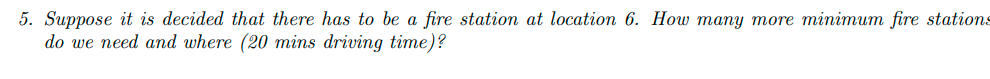

In [30]:
#In the update set we will remmove location6

upd_universe=list(Universe)
upd_universe.remove("F") # remoing F
Universe=set(upd_universe)
#updated collection of sets are
subset=[{"A","B"},{"B","D"},{"C","H"},{"E","G"}]

#Implementing te greedy algorithm
solution_set3=greedy_set_cover(subset,Universe)
print("The minimum number of firestations needed When a firestation is already at location F are",len(solution_set3))
# prinitng the locations where these stations can be placed
location3=[]
for i in solution_set3:
  b=list(i)
  location3.append(b)
for i in range(len(solution_set3)):
  c=location3[i][0]
  print(f"The {i+1} fire station can be placed at {c} ")

The minimum number of firestations needed When a firestation is already at location F are 4
The 1 fire station can be placed at B 
The 2 fire station can be placed at H 
The 3 fire station can be placed at E 
The 4 fire station can be placed at B 



After deciding to place a fire station at location 6, we assess the feasible set formed around location 6 to determine the number of locations it covers. Subsequently, we remove these covered locations along with location 6 from the universe, resulting in an updated universe. Next, for each remaining location in the updated universe, we examine the collection of subsets that cover it. Applying the greedy algorithm to this revised scenario, we obtain a new feasible solution, indicating how many additional fire stations are required to cover all remaining locations within the specified driving time. This iterative approach ensures efficient coverage while accommodating the new constraint of having a fire station at location 6.